In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
from os import makedirs, path, listdir, remove
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from tqdm import tqdm
from ADMS_functions import plot_in_grid_box

/home/users/mwlw3/miniconda3/envs/AQmort/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
folder = "/home/users/mwlw3/ADMS-Urban/2018_P-G_classes/all_regions/001/"
files = [path.join(folder, file) for file in listdir(folder) if path.splitext(file)[-1]==".nc"]

In [22]:
variable = "NO2"
choose_PG_class = "G"
coordinate_system = "gridded_295" # "gridded****" or "raw_latlon"

In [23]:
if coordinate_system == "raw_latlon":
    filepath = path.join(folder, "raw_processed_coordinates.nc")
else:
    filepath = path.join(folder, f"{coordinate_system}/", f"{variable}_PG_classes_grid.nc")

ds = xr.open_dataset(filepath)

In [24]:
PG_index = ["A", "B", "C", "D", "E", "F", "G"]
da = ds.isel(PG_class=PG_index.index(choose_PG_class))[variable]
# da = ds[variable][:, :, PG_index.index(choose_PG_class)]
array = np.rot90(da.values)

In [25]:
array.shape

(165, 296)

In [26]:
print("Before: ", np.sum(np.isnan(array)), "NaN values")
array[np.isnan(array)] = 0
print("After: ", np.sum(np.isnan(array)), "NaN values")

Before:  4042 NaN values
After:  0 NaN values


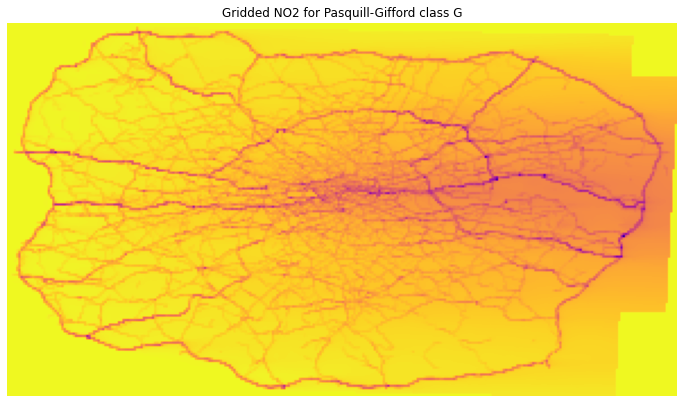

In [44]:
fig, ax = plt.subplots(figsize=(12,7))
ax.imshow(array, cmap="plasma_r")
ax.axis("off")
plt.title(f"Gridded {variable} for Pasquill-Gifford class {choose_PG_class}")
plt.show()

In [28]:
U, S, Vt = np.linalg.svd(array) # default is full_matrices=True

In [29]:
print(U.shape, S.shape, Vt.shape)

(165, 165) (165,) (296, 296)


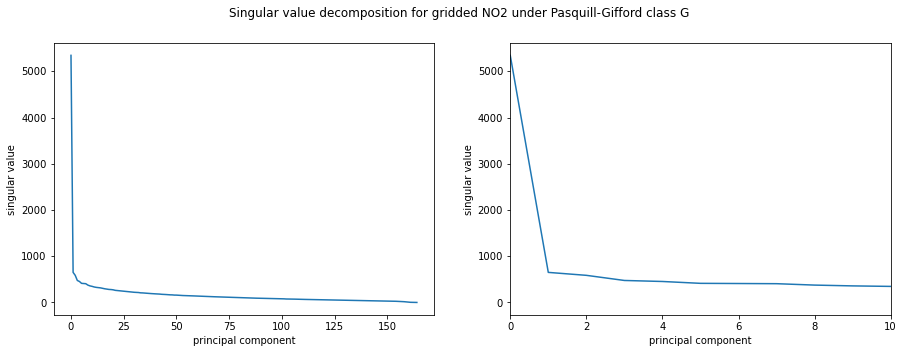

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
for ax in (ax1, ax2):
    ax.plot(S)
    ax.set_xlabel("principal component")
    ax.set_ylabel("singular value")
ax2.set_xlim((0, 10))
fig.suptitle(f"Singular value decomposition for gridded {variable} under Pasquill-Gifford class {choose_PG_class}")
plt.show()

In [31]:
# Turn the S vector into a diagonal matrix
S_matrix = np.zeros((U.shape[1], Vt.shape[0]))
S_matrix[:np.diag(S).shape[0], :np.diag(S).shape[1]] = np.diag(S)
print(U.shape, S_matrix.shape, Vt.shape)

(165, 165) (165, 296) (296, 296)


In [32]:
# Does U . S_matrix . Vt = array ?
np.allclose(array, np.dot(U, np.dot(S_matrix, Vt)))

True

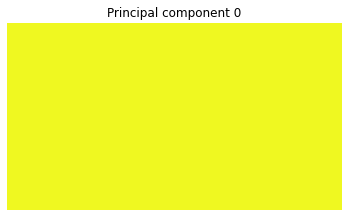

In [37]:
# Plot a principal component
choose = 0
component = np.dot(U[:, :choose], np.dot(S_matrix[:choose, :choose], Vt[:choose, :]))
plt.imshow(component, cmap="plasma_r")
plt.title(f"Principal component {choose}")
plt.axis("off")
plt.show()

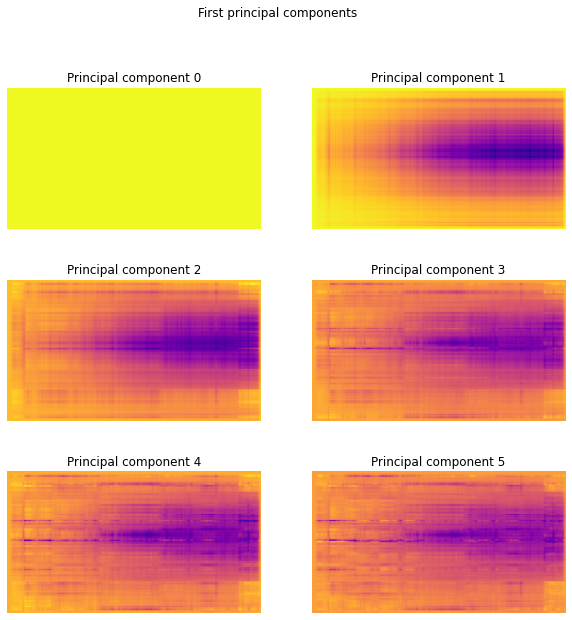

In [42]:
fig, axs = plt.subplots(3,2, figsize=(10,10))
axs = axs.ravel()

for i in range(len(axs)):
    component = np.dot(U[:, :i], np.dot(S_matrix[:i, :i], Vt[:i, :]))
    axs[i].imshow(component, cmap="plasma_r")
    axs[i].set_title(f"Principal component {i}")
    axs[i].axis("off")
fig.suptitle(f"First principal components")
plt.show()